In [65]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [66]:
#%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
from matplotlib import pyplot
from matplotlib.colors import LogNorm
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pass

In [67]:
%%bash
pwd

/home/local/WIN/bciezah1/Documents/scripts/scripts-05-19-2021/scripts


In [68]:
# Setup plot styles for saving figures.
def figure_style():
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-8,8), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': 9, "axes.titlesize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0,"markerfacecolor":None}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [69]:
# Setup plot styles for on-screen plotting.
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [70]:
# Setup plot styles for saving figures.
def movie_style(multiplier):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': multiplier*6, "axes.titlesize": multiplier*7, "xtick.labelsize": multiplier*5, "ytick.labelsize": multiplier*5,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^'] 

In [71]:
# define some project specific functions

In [72]:
import scipy.optimize as opt
import scipy.integrate as integrate
screen_style()
pass

In [73]:
from matplotlib.backends.backend_pdf import PdfPages
figuredir = "figures"
if not os.path.exists(figuredir): os.mkdir(figuredir)

# k1 vs k3 - phase diagram

## No Nucleation

### first option

In [74]:
N1=np.logspace(-10, -1, num=50) # points sampled in the matrix to plot
N1;

In [75]:
N1=np.logspace(-10, -1, num=50);# adding above points to a list to be used for the plot
seq=[]
for i in N1:
    seq.append('{:0.0e}'.format(i))
seq;

In [76]:
1e-01

0.1

In [77]:
# reading data
dir='/media/bciezah1/BCH_USB_2/paper/figures/fig4/fig4a/data/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_dis_400sim_100Lx100L_rep0_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep10_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep11_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep12_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep13_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep15_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep16_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep17_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep18_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep19_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep1_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep20_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep2_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep3_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep4_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep5_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep6_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep7_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep8_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep9_lat_50_no_nuc.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)  

('ready', (50, 50, 21))


(array([0.        , 0.13381017, 0.26762034, 0.40143051, 0.53524068,
        0.66905084, 0.80286101, 0.93667118]),
 <a list of 8 Text yticklabel objects>)

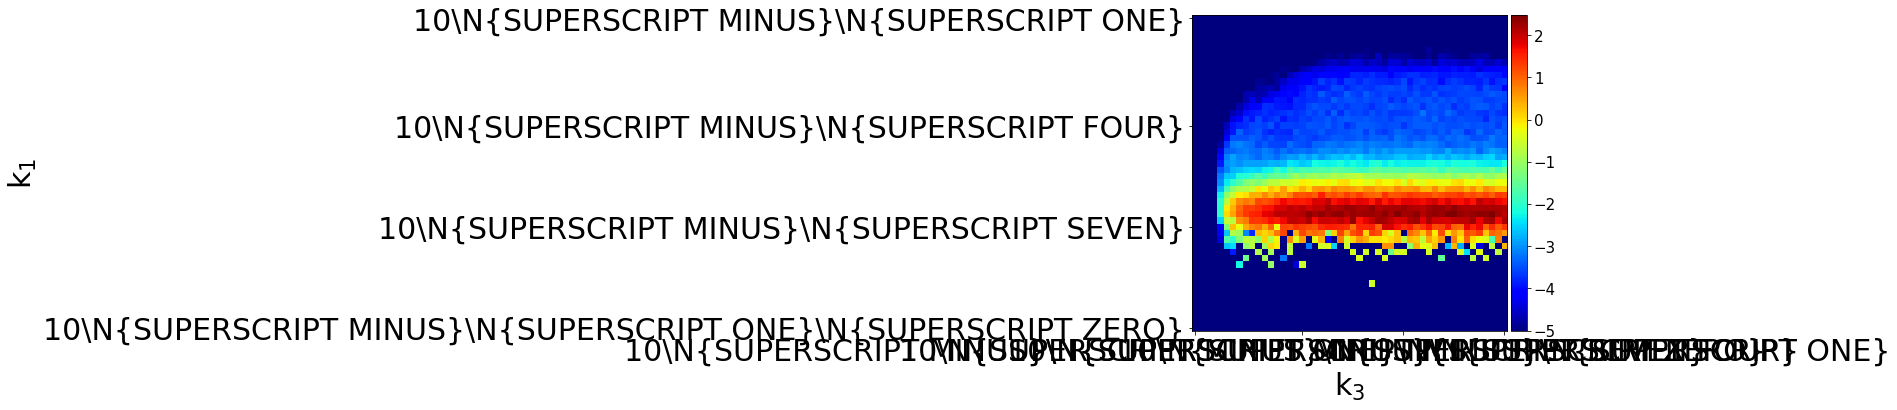

In [46]:
import matplotlib.ticker as mtick
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
#m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
m = ax1.imshow(newmatrix,cmap = 'jet')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


IOError: Unable to open file (unable to open file: name = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

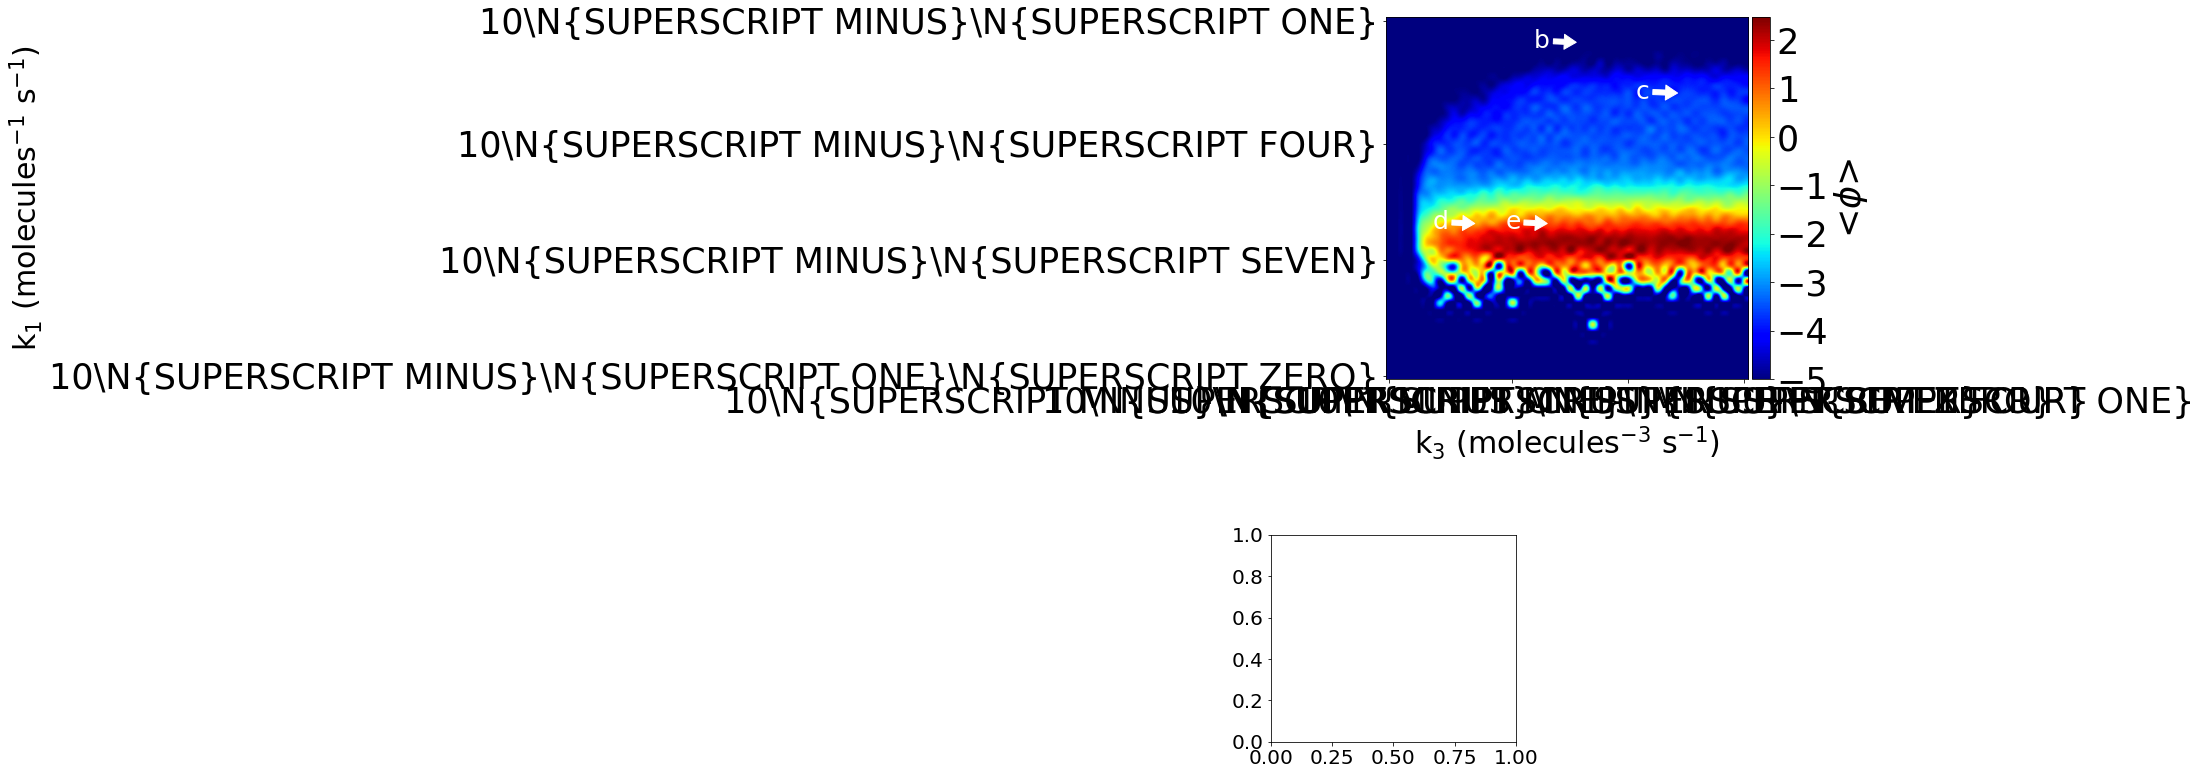

In [47]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def

dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/'

#dir ='/media/Data/MARCC/without_nuc/rep0/lm_traj/'
#dir2 ='/media/Data/swarm-article/figures/data/figure4/data-fig4bcde/fractal_shape_long_sim/'
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ (molecules${^{-1}}$ s${^{-1}}$)',fontsize=30);plt.xlabel('$\mathregular{k_3}$ (molecules${^{-3}}$ s${^{-1}}$)',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,3),xytext=(20,3.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,10),xytext=(34,10.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,28),xytext=(6,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(22,28),xytext=(16,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 1', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_opt_1.pdf',bbox_inches='tight')
#plt.show()
#plt.savefig('phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

### second option: no rate constants

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm


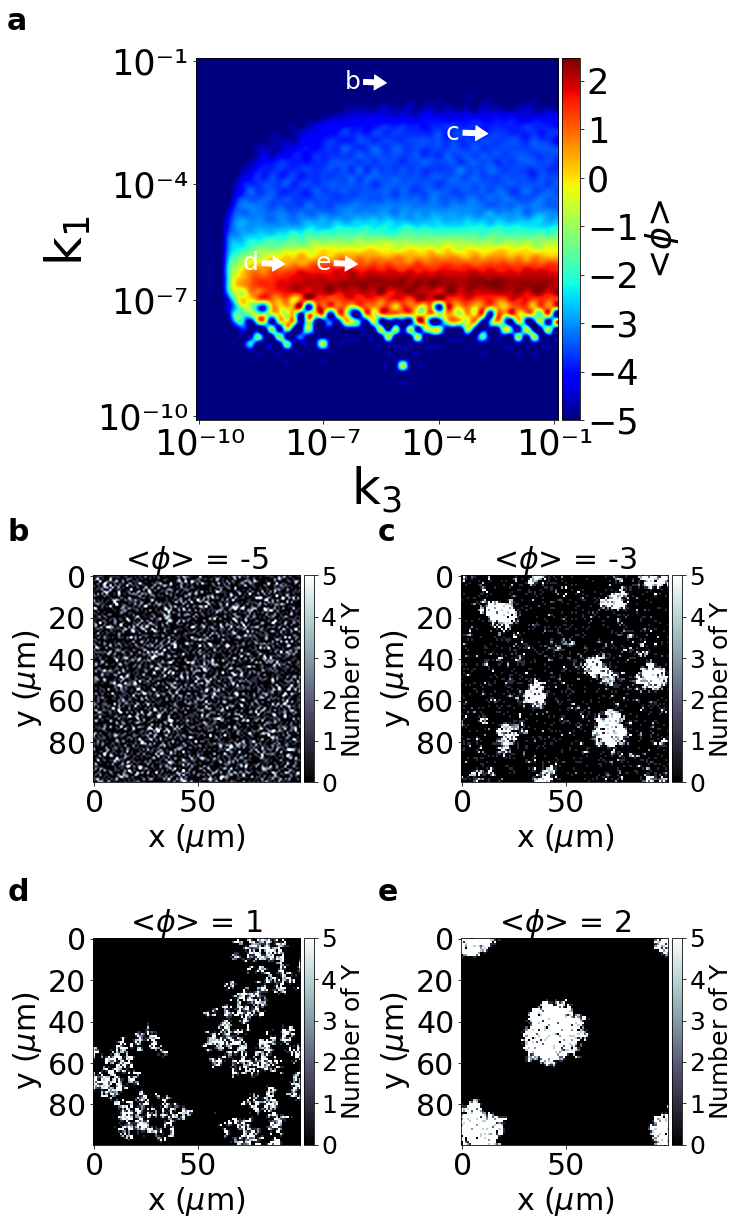

In [18]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,3),xytext=(20,3.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,10),xytext=(34,10.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,28),xytext=(6,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(22,28),xytext=(16,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 1', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
print(filename1)

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_03_18_2021_v0.png',bbox_inches='tight')
#plt.show()
plt.savefig('fig4_no_nuc_05_20_2021.pdf',bbox_inches='tight')

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


Text(0.5, 0.31, 'e')

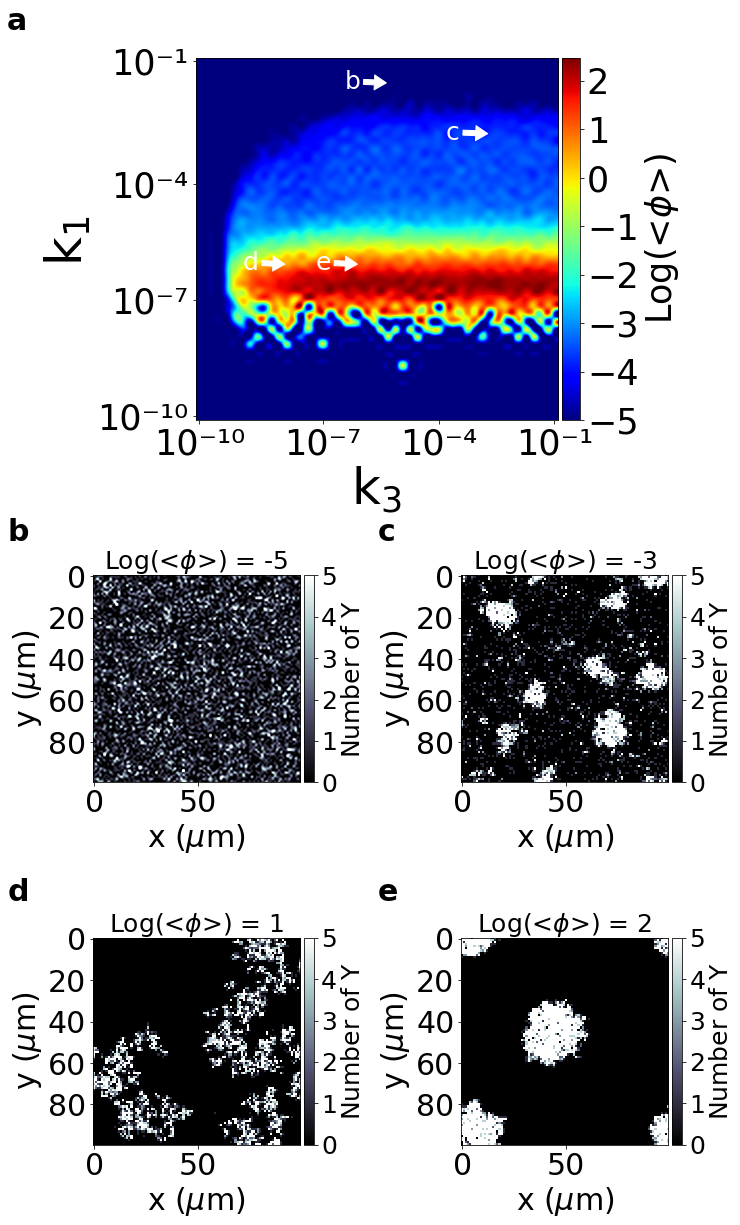

In [36]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('Log(<$\phi$>)',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,3),xytext=(20,3.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,10),xytext=(34,10.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,28),xytext=(6,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(22,28),xytext=(16,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = -5', fontsize=25)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = 1', fontsize=25)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = -3', fontsize=25)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = 2', fontsize=25)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_03_18_2021_v4.png',bbox_inches='tight')
#plt.show()
#plt.savefig('phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig4/fig4bcde/data/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


Text(0.52, 0.32, 'e')

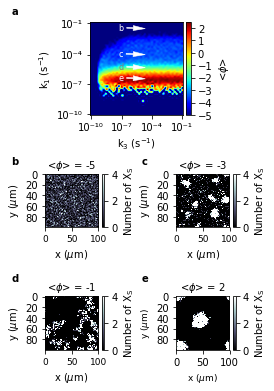

In [38]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
fig = plt.figure(figsize=(3.42,6.22))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.3,0.3,1,1], wspace=1.2,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=10)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=10)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=10);plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=10)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(-5,2,8,endpoint=True).astype(int)
plt.colorbar(m,ticks=v, cax=cax)
plt.yticks(fontsize=10);plt.ylabel('<$\phi$>',fontsize=10)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(30,3),xytext=(15,3.8),fontsize=8,arrowprops=dict(width=1,headwidth=5,shrink=0.05,linewidth=0.5,color='white'))
ax1.annotate('c',color='white',xy=(30,17),xytext=(15,17.8),fontsize=8,arrowprops=dict(width=1,headwidth=5,shrink=0.05,linewidth=0.5,color='white'))
ax1.annotate('d',color='gray',xy=(30,24),xytext=(15,24.8),fontsize=8,arrowprops=dict(width=1,headwidth=5,shrink=0.05,linewidth=0.5,color='white'))
ax1.annotate('e',color='white',xy=(30,30),xytext=(15,30.8),fontsize=8,arrowprops=dict(width=1,headwidth=5,shrink=0.05,linewidth=0.5,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=10)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=4,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=10);plt.xlabel('x ($\mu$m)',fontsize=10)
plt.yticks((0,20,40,60,80),fontsize=10);plt.xticks(fontsize=9)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,4,3,endpoint=True).astype(int)
plt.colorbar(m,ticks=v, cax=cax)
plt.yticks(fontsize=10);
plt.ylabel('Number of $\mathregular{X_{S}}$',fontsize=10)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -1', fontsize=10)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=4,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=10);plt.xlabel('x ($\mu$m)',fontsize=10)
plt.yticks((0,20,40,60,80),fontsize=10);plt.xticks(fontsize=9)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,4,3,endpoint=True).astype(int)
plt.colorbar(m,ticks=v, cax=cax)
plt.yticks(fontsize=10);
plt.ylabel('Number of $\mathregular{X_{S}}$',fontsize=10)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#filename1 =dir+"k1_2.560e-06_and_k3_2.947e-09_100x100.lm"
filename1 =dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=10)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=4,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=10);plt.xlabel('x ($\mu$m)',fontsize=10)
plt.yticks((0,20,40,60,80),fontsize=10);plt.xticks(fontsize=9)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,4,3,endpoint=True).astype(int)
plt.colorbar(m,ticks=v, cax=cax)
plt.yticks(fontsize=10);
plt.ylabel('Number of $\mathregular{X_{S}}$',fontsize=10)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=10)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=4,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=9);plt.xlabel('x ($\mu$m)',fontsize=9)
plt.yticks((0,20,40,60,80),fontsize=10);plt.xticks(fontsize=10)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
v=linspace(0,4,3,endpoint=True).astype(int)
plt.colorbar(m,ticks=v, cax=cax)
plt.yticks(fontsize=10);
plt.ylabel('Number of $\mathregular{X_{S}}$',fontsize=10)

#######################################################################################
figtext(-0.01,0.915,"a", {'ha':'left','va':'top','fontsize':10, 'fontweight':'bold'})
figtext(-0.01,0.580,"b", {'ha':'left','va':'top','fontsize':10, 'fontweight':'bold'})
figtext(0.520,0.580,"c", {'ha':'left','va':'top','fontsize':10, 'fontweight':'bold'})
figtext(-0.01,0.320,"d", {'ha':'left','va':'top','fontsize':10, 'fontweight':'bold'})
figtext(0.520,0.320,"e", {'ha':'left','va':'top','fontsize':10, 'fontweight':'bold'})
#plt.savefig('fig4.pdf',bbox_inches='tight')

# New theta parameter as a function of just swarmers

In [24]:
# reading data
dir='/media/Data/swarm-article/figures/data/figure4/data-fig4a_v2_just_swarmers/v2/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_distance_rep0_03_26_2021.txt",
      "data_pair_distance_rep11_03_26_2021.txt",
      "data_pair_distance_rep13_03_26_2021.txt",
      "data_pair_distance_rep16_03_26_2021.txt",
      "data_pair_distance_rep20_2_03_26_2021.txt",
      "data_pair_distance_rep21_03_26_2021.txt",
      "data_pair_distance_rep24_03_26_2021.txt",
      "data_pair_distance_rep3_03_26_2021.txt",
      "data_pair_distance_rep7_03_26_2021.txt",
      "data_pair_distance_rep1_03_26_2021.txt",
      "data_pair_distance_rep12_03_26_2021.txt",
      "data_pair_distance_rep15_03_26_2021.txt",
      "data_pair_distance_rep20_03_26_2021.txt",
      "data_pair_distance_rep2_03_26_2021.txt",
      "data_pair_distance_rep23_03_26_2021.txt",
      "data_pair_distance_rep25_03_26_2021.txt",
      "data_pair_distance_rep4_03_26_2021.txt",
      "data_pair_distance_rep8_03_26_2021.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)  

ready (50, 50, 19)


In [25]:
np.mean(np.average(temp1[:,:,1:14],axis=2))

25.767746914001055

(array([-6., -4., -2.,  0.,  2.]), <a list of 5 Text yticklabel objects>)

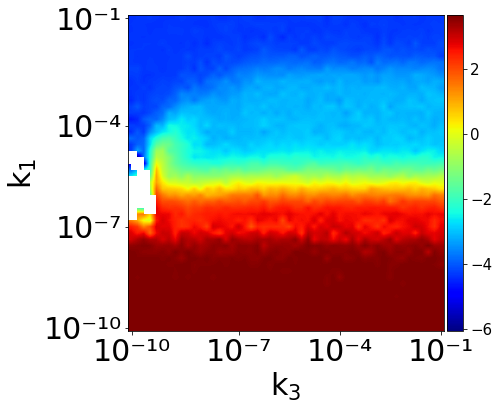

In [26]:
import matplotlib.ticker as mtick
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='bilinear')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

In [27]:
# replacing NAN values by mean values
ini_array = log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
#print(ini_array)

col_mean = np.nanmean(ini_array,axis=1)
inds = np.where(np.isnan(ini_array))
#print(inds)

ini_array[inds] = np.take(col_mean,inds[1])
#print(ini_array)

(array([-6., -4., -2.,  0.,  2.]), <a list of 5 Text yticklabel objects>)

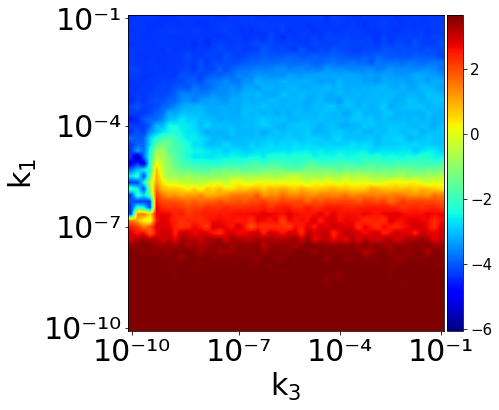

In [30]:
import matplotlib.ticker as mtick
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
m = ax1.imshow(ini_array,cmap = 'jet',interpolation='bilinear')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

/media/Data/swarm-article/figures/data/figure4/data-fig4a_v2_just_swarmers/v2/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


OSError: Unable to open file (unable to open file: name = '/media/Data/swarm-article/figures/data/figure4/data-fig4a_v2_just_swarmers/v2/k1_2.812e-02_and_k3_3.089e-07_100x100.lm', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

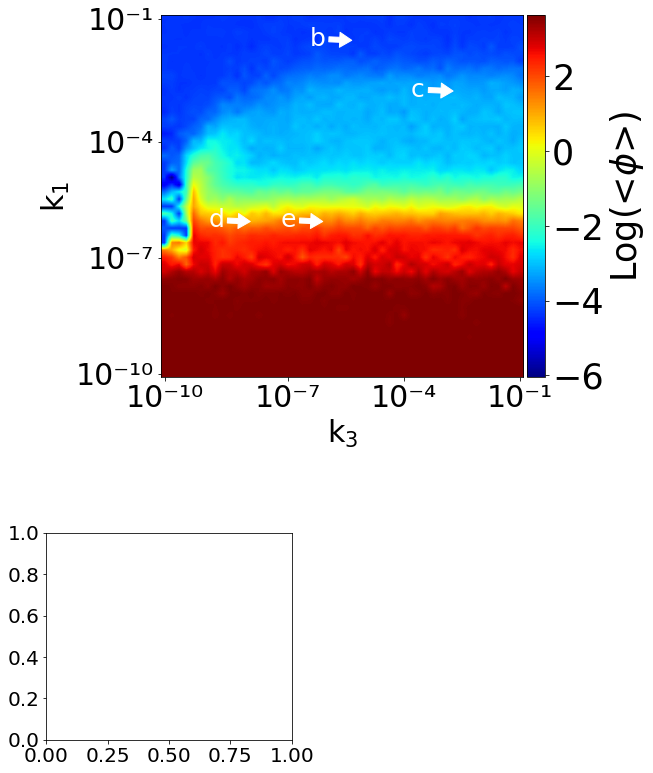

In [29]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
m = ax1.imshow(ini_array,cmap = 'jet',interpolation='bilinear')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('Log(<$\phi$>)',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,3),xytext=(20,3.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,10),xytext=(34,10.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,28),xytext=(6,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(22,28),xytext=(16,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = -5', fontsize=25)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir2+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = 1', fontsize=25)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir2+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = -3', fontsize=25)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir2+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('Log(<$\phi$>) = 2', fontsize=25)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_03_18_2021_v4.png',bbox_inches='tight')
#plt.show()
#plt.savefig('phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

# Supplement 100x100

Text(0, 0.5, '<$\\phi$>')

/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


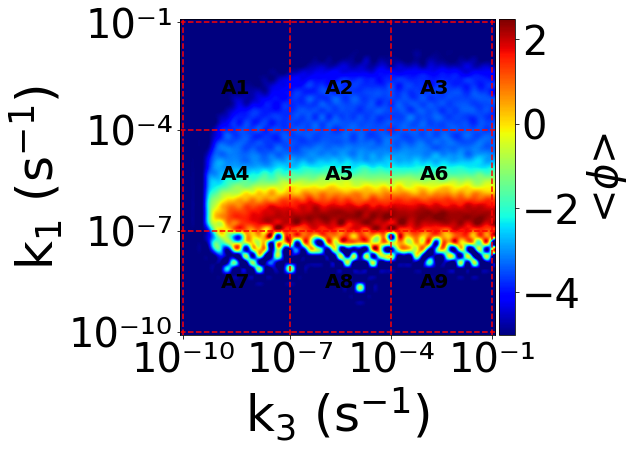

In [56]:
import matplotlib.ticker as mtick
import seaborn as sns
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
#m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=40)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=40)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=50);plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=50)
#plt.grid(True,xdata=np.array([0,9,19,29,39,49]))
#################################################################
ax1.axvline(x=0,color='red',linestyle='--')
ax1.axvline(x=17,color='red',linestyle='--')
ax1.axvline(x=33,color='red',linestyle='--')
ax1.axvline(x=49,color='red',linestyle='--')
#ax1.axvline(x=20,color='red',linestyle='--')
#horizontal
#ax1.axhline(y=0,color='red',linestyle='--') 
ax1.axhline(y=0,color='red',linestyle='--')
ax1.axhline(y=17,color='red',linestyle='--') 
ax1.axhline(y=33,color='red',linestyle='--')
ax1.axhline(y=49,color='red',linestyle='--') 

#############################################

figtext(0.220,0.730,"A1", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.460,0.730,"A2", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.680,0.730,"A3", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.220,0.530,"A4", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.460,0.530,"A5", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.680,0.530,"A6", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.220,0.280,"A7", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.460,0.280,"A8", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.680,0.280,"A9", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=40);plt.ylabel('<$\phi$>',fontsize=40)
#plt.savefig('S1_phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

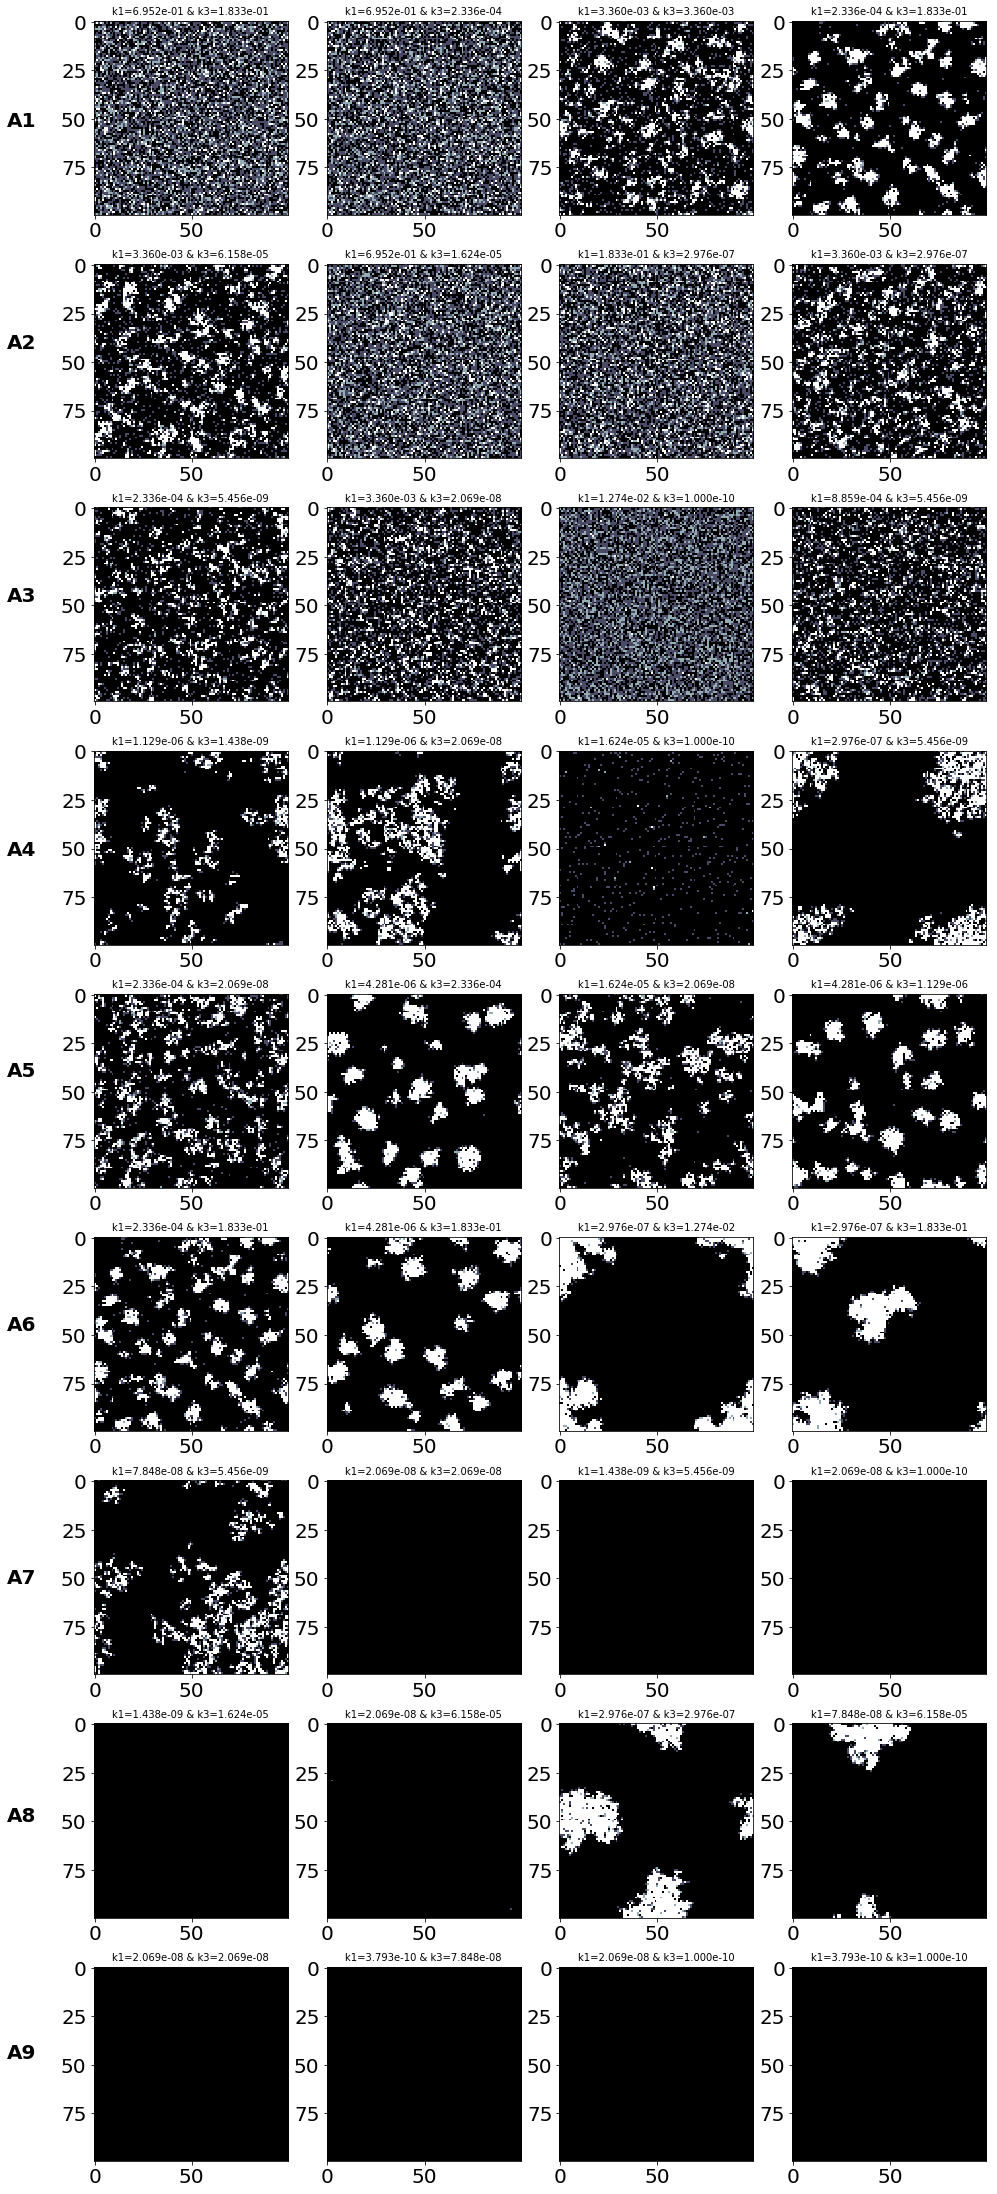

In [57]:
dir='/media/Data/swarm-article/figures/data/figure4/data-suplement/phase-separation/100x100/no_nuc/' # my files' path
replicate=1
startTimestep=0
#endTimestep=len(times1)

name=["k1_6.952e-01_and_k3_1.833e-01_100x100.lm","k1_6.952e-01_and_k3_2.336e-04_100x100.lm",\
      "k1_3.360e-03_and_k3_3.360e-03_100x100.lm","k1_2.336e-04_and_k3_1.833e-01_100x100.lm",\
      "k1_3.360e-03_and_k3_6.158e-05_100x100.lm","k1_6.952e-01_and_k3_1.624e-05_100x100.lm",\
      "k1_1.833e-01_and_k3_2.976e-07_100x100.lm","k1_3.360e-03_and_k3_2.976e-07_100x100.lm",\
      "k1_2.336e-04_and_k3_5.456e-09_100x100.lm","k1_3.360e-03_and_k3_2.069e-08_100x100.lm",\
      "k1_1.274e-02_and_k3_1.000e-10_100x100.lm","k1_8.859e-04_and_k3_5.456e-09_100x100.lm",\
      "k1_1.129e-06_and_k3_1.438e-09_100x100.lm","k1_1.129e-06_and_k3_2.069e-08_100x100.lm",\
      "k1_1.624e-05_and_k3_1.000e-10_100x100.lm","k1_2.976e-07_and_k3_5.456e-09_100x100.lm",\
      "k1_2.336e-04_and_k3_2.069e-08_100x100.lm","k1_4.281e-06_and_k3_2.336e-04_100x100.lm",\
      "k1_1.624e-05_and_k3_2.069e-08_100x100.lm","k1_4.281e-06_and_k3_1.129e-06_100x100.lm",\
      "k1_2.336e-04_and_k3_1.833e-01_100x100.lm","k1_4.281e-06_and_k3_1.833e-01_100x100.lm",\
      "k1_2.976e-07_and_k3_1.274e-02_100x100.lm","k1_2.976e-07_and_k3_1.833e-01_100x100.lm",\
      "k1_7.848e-08_and_k3_5.456e-09_100x100.lm","k1_2.069e-08_and_k3_2.069e-08_100x100.lm",\
      "k1_1.438e-09_and_k3_5.456e-09_100x100.lm","k1_2.069e-08_and_k3_1.000e-10_100x100.lm",\
      "k1_1.438e-09_and_k3_1.624e-05_100x100.lm","k1_2.069e-08_and_k3_6.158e-05_100x100.lm",\
      "k1_2.976e-07_and_k3_2.976e-07_100x100.lm","k1_7.848e-08_and_k3_6.158e-05_100x100.lm",\
      "k1_2.069e-08_and_k3_2.069e-08_100x100.lm","k1_3.793e-10_and_k3_7.848e-08_100x100.lm",\
      "k1_2.069e-08_and_k3_1.000e-10_100x100.lm","k1_3.793e-10_and_k3_1.000e-10_100x100.lm"]#selected traj



plt.figure(figsize = (16,44)); # figure size
#suptitle("Without Nucleation",fontsize=50);

for i in range(1,len(name)+1): # loop start
    mytitle=name[i-1][0:2]+"="+name[i-1][3:12]+" & "+name[i-1][17:19]+"="+name[i-1][20:29] # title for each subplot
    #print(mytitle)
    plt.subplot(10,4,i) # subplot location
    title(mytitle,fontsize=10); #subplot title
    filename1 =dir+str(name[i-1])
    fp1 = h5py.File(filename1, "r")
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
    lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
    SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
    TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
    m=imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
#plt.savefig('Suplement_fig1_panel_without_nucleation_shapes.pdf',bbox_inches='tight')

figtext(0.05,0.85,"A1", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.78,"A2", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.70,"A3", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.62,"A4", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.55,"A5", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.47,"A6", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.39,"A7", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.315,"A8", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.24,"A9", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#plt.savefig('S2_phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

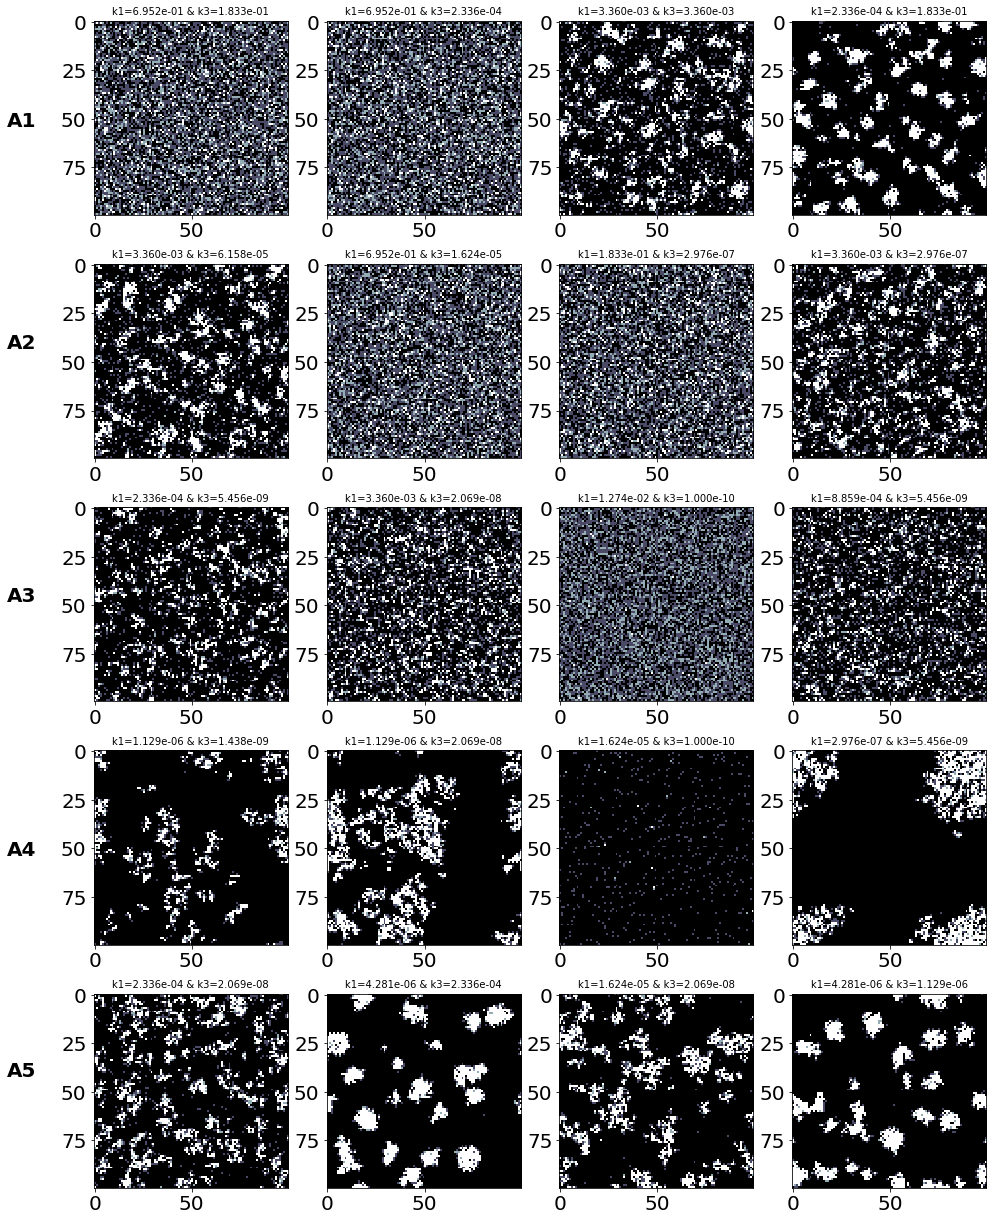

In [58]:
dir='/media/Data/swarm-article/figures/data/figure4/data-suplement/phase-separation/100x100/no_nuc/' # my files' path
replicate=1
startTimestep=0
#endTimestep=len(times1)

name=["k1_6.952e-01_and_k3_1.833e-01_100x100.lm","k1_6.952e-01_and_k3_2.336e-04_100x100.lm",\
      "k1_3.360e-03_and_k3_3.360e-03_100x100.lm","k1_2.336e-04_and_k3_1.833e-01_100x100.lm",\
      "k1_3.360e-03_and_k3_6.158e-05_100x100.lm","k1_6.952e-01_and_k3_1.624e-05_100x100.lm",\
      "k1_1.833e-01_and_k3_2.976e-07_100x100.lm","k1_3.360e-03_and_k3_2.976e-07_100x100.lm",\
      "k1_2.336e-04_and_k3_5.456e-09_100x100.lm","k1_3.360e-03_and_k3_2.069e-08_100x100.lm",\
      "k1_1.274e-02_and_k3_1.000e-10_100x100.lm","k1_8.859e-04_and_k3_5.456e-09_100x100.lm",\
      "k1_1.129e-06_and_k3_1.438e-09_100x100.lm","k1_1.129e-06_and_k3_2.069e-08_100x100.lm",\
      "k1_1.624e-05_and_k3_1.000e-10_100x100.lm","k1_2.976e-07_and_k3_5.456e-09_100x100.lm",\
      "k1_2.336e-04_and_k3_2.069e-08_100x100.lm","k1_4.281e-06_and_k3_2.336e-04_100x100.lm",\
      "k1_1.624e-05_and_k3_2.069e-08_100x100.lm","k1_4.281e-06_and_k3_1.129e-06_100x100.lm"]
      #selected traj



plt.figure(figsize = (16,44)); # figure size
#suptitle("Without Nucleation",fontsize=50);

for i in range(1,len(name)+1): # loop start
    mytitle=name[i-1][0:2]+"="+name[i-1][3:12]+" & "+name[i-1][17:19]+"="+name[i-1][20:29] # title for each subplot
    #print(mytitle)
    plt.subplot(10,4,i) # subplot location
    title(mytitle,fontsize=10); #subplot title
    filename1 =dir+str(name[i-1])
    fp1 = h5py.File(filename1, "r")
    lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
    lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
    lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
    SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
    TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
    m=imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=3,cmap=cm.bone);
#plt.savefig('Suplement_fig1_panel_without_nucleation_shapes.pdf',bbox_inches='tight')

figtext(0.05,0.85,"A1", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.78,"A2", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.70,"A3", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.62,"A4", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
figtext(0.05,0.55,"A5", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#figtext(0.05,0.47,"A6", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#figtext(0.05,0.39,"A7", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#figtext(0.05,0.315,"A8", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#figtext(0.05,0.24,"A9", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
#plt.savefig('S2_phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

## END ##

## Alternative fig 4a

In [16]:
# reading data
dir='/media/bciezah1/BCH_USB_2/paper/figures/fig4/fig4a/data/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_dis_400sim_100Lx100L_rep0_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep10_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep11_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep12_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep13_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep15_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep16_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep17_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep18_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep19_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep1_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep20_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep2_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep3_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep4_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep5_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep6_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep7_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep8_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep9_lat_50_no_nuc.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)

('ready', (50, 50, 21))


(array([0.05653347, 0.19133295, 0.32613244, 0.46093192, 0.5957314 ,
        0.73053089, 0.86533037]), <a list of 7 Text yticklabel objects>)

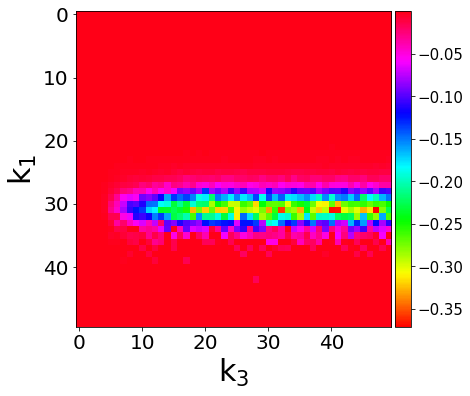

In [62]:
import matplotlib.ticker as mtick
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
newmatrix=np.log((np.flip(np.average(temp1[:,:,1:21],axis=2),0))/38.27)
#newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'hsv')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis

plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

In [64]:
np.max(newmatrix)

-4.8165263895385244e-05

# DATA: 03-16-2021

In [40]:
data_temp = np.average(temp1[:,:,1:21],axis=2)

In [44]:
#data_temp[:25,:]-np.min(data_temp[:25,:]))/(np.max(data_temp[:25,:])-np.min(data_temp[:25,:]))

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

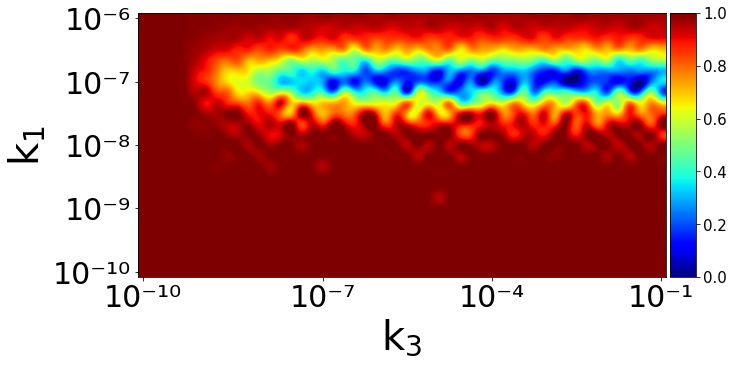

In [45]:
import matplotlib.ticker as mtick
figure(figsize = (10,8))
ax1=plt.subplot(1, 1, 1)
sample=25
data_ready=(data_temp[:sample,:]-np.min(data_temp[:sample,:]))/(np.max(data_temp[:sample,:])-np.min(data_temp[:sample,:]))
m = ax1.imshow(np.flip(data_ready,0),cmap = 'jet',interpolation='lanczos')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT NINE}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT EIGHT}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SIX}']
ax1.set_yticks([24,18,12,6,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)

x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)

plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

/media/Data/MARCC/without_nuc/rep1/lm_traj/k1_5.964e-06_and_k3_1.389e-05_100x100.lm
/media/Data/MARCC/without_nuc/rep1/lm_traj/k1_1.326e-07_and_k3_1.389e-05_100x100.lm


Text(0.5, 0.31, 'e')

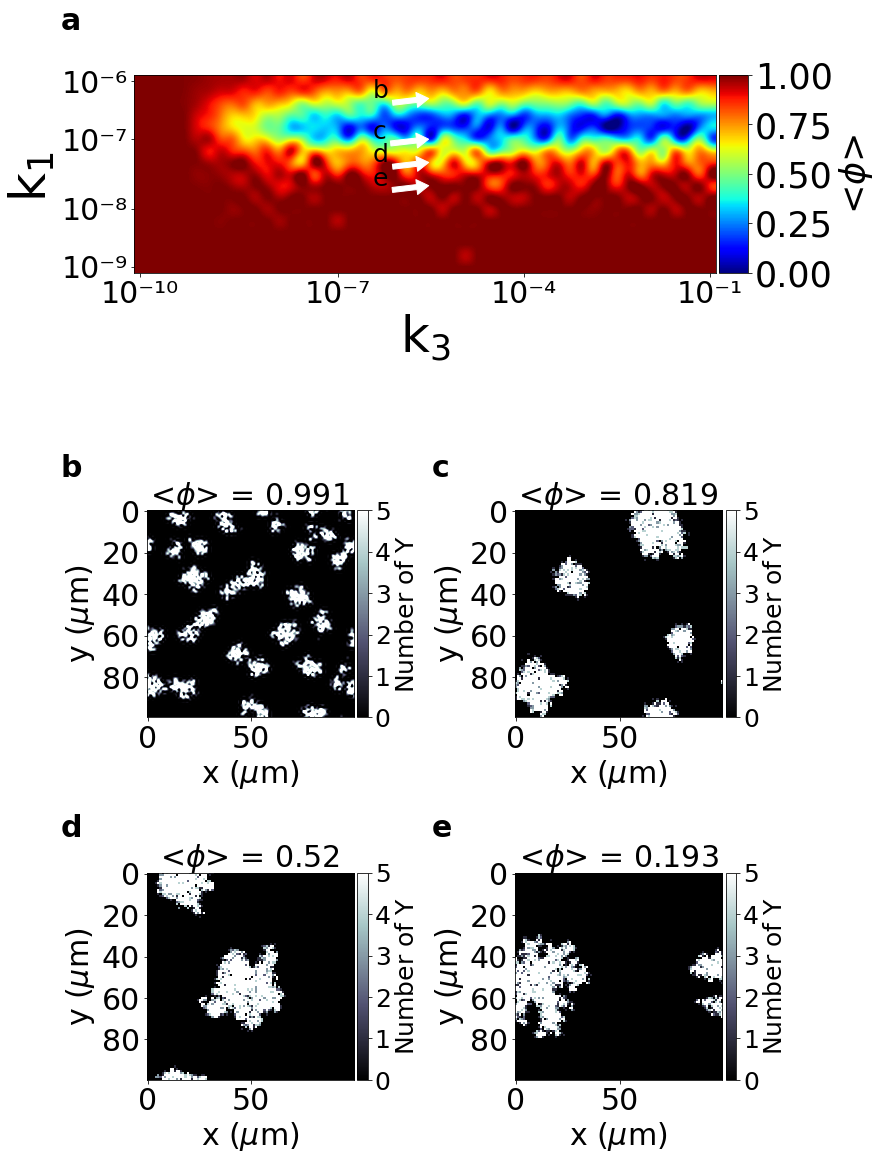

In [47]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
dir='/media/Data/MARCC/without_nuc/rep1/lm_traj/'
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
init_sample=6
end_sample = 23
m = ax1.imshow(np.flip((data_temp[init_sample:end_sample,:]-np.min(data_temp[init_sample:end_sample,:]))/(np.max(data_temp[init_sample:end_sample,:])-np.min(data_temp[init_sample:end_sample,:])),0),cmap = 'jet',interpolation='lanczos')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT NINE}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT EIGHT}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SIX}']
ax1.set_yticks([16,11,5,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)

x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)

#plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)


plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='black',xy=(25,1.5),xytext=(20,1.5),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='black',xy=(25,5),xytext=(20,5),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='black',xy=(25,7),xytext=(20,7),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='black',xy=(25,9),xytext=(20,9),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_5.964e-06_and_k3_1.389e-05_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 0.991', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir+"k1_3.089e-07_and_k3_1.389e-05_100x100.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 0.52', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
#filename1 =dir2+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"
filename1 =dir+"k1_7.197e-07_and_k3_1.389e-05_100x100.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 0.819', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir+"k1_1.326e-07_and_k3_1.389e-05_100x100.lm"
fp1 = h5py.File(filename1, "r")
print(filename1)
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 0.193', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.87,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_03_18_2021_v3.png',bbox_inches='tight')
#plt.show()
#plt.savefig('phase_separation_100x100_no_nuc_examples_fig4_v1.png',bbox_inches='tight')

In [48]:
init_sample=6
end_sample = 23
N1[init_sample:end_sample]

array([1.26485522e-09, 1.93069773e-09, 2.94705170e-09, 4.49843267e-09,
       6.86648845e-09, 1.04811313e-08, 1.59985872e-08, 2.44205309e-08,
       3.72759372e-08, 5.68986603e-08, 8.68511374e-08, 1.32571137e-07,
       2.02358965e-07, 3.08884360e-07, 4.71486636e-07, 7.19685673e-07,
       1.09854114e-06])

In [218]:
len(N1[init_sample:end_sample])

14

In [259]:
N1

array([1.00000000e-10, 1.52641797e-10, 2.32995181e-10, 3.55648031e-10,
       5.42867544e-10, 8.28642773e-10, 1.26485522e-09, 1.93069773e-09,
       2.94705170e-09, 4.49843267e-09, 6.86648845e-09, 1.04811313e-08,
       1.59985872e-08, 2.44205309e-08, 3.72759372e-08, 5.68986603e-08,
       8.68511374e-08, 1.32571137e-07, 2.02358965e-07, 3.08884360e-07,
       4.71486636e-07, 7.19685673e-07, 1.09854114e-06, 1.67683294e-06,
       2.55954792e-06, 3.90693994e-06, 5.96362332e-06, 9.10298178e-06,
       1.38949549e-05, 2.12095089e-05, 3.23745754e-05, 4.94171336e-05,
       7.54312006e-05, 1.15139540e-04, 1.75751062e-04, 2.68269580e-04,
       4.09491506e-04, 6.25055193e-04, 9.54095476e-04, 1.45634848e-03,
       2.22299648e-03, 3.39322177e-03, 5.17947468e-03, 7.90604321e-03,
       1.20679264e-02, 1.84206997e-02, 2.81176870e-02, 4.29193426e-02,
       6.55128557e-02, 1.00000000e-01])

/media/Data/MARCC/without_nuc/rep0/lm_traj/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


OSError: Unable to open file (unable to open file: name = '/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

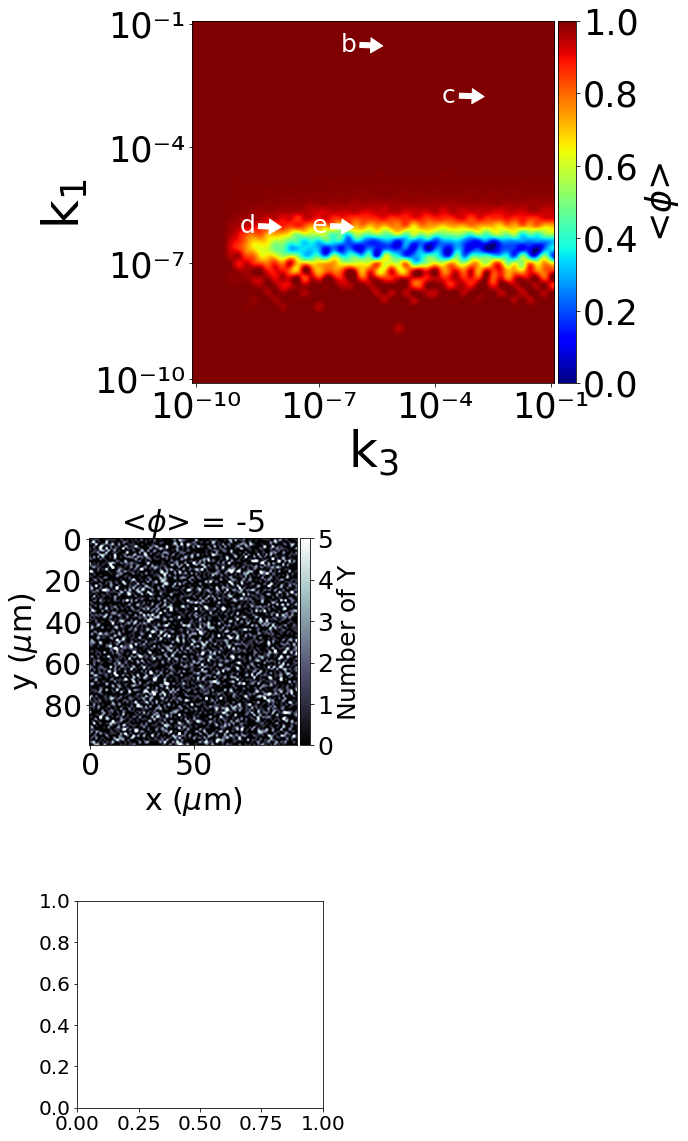

In [49]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
dir='/media/Data/MARCC/without_nuc/rep0/lm_traj/'
dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])
sample=49
data_temp = np.average(temp1[:,:,1:21],axis=2)
data_ready=(data_temp[:,:]-np.min(data_temp[:,:]))/(np.max(data_temp[:sample,:])-np.min(data_temp[:sample,:]))
m = ax1.imshow(np.flip(data_ready,0),cmap = 'jet',interpolation='lanczos')

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,3),xytext=(20,3.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,10),xytext=(34,10.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,28),xytext=(6,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(22,28),xytext=(16,28.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir2+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 1', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c


filename1 =dir2+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir2+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4-phase_separation-no_nuc_03_18_2021_v2.png',bbox_inches='tight')

In [50]:
data_temp = np.average(temp1[:,:,1:21],axis=2)

In [51]:
data_temp.shape

(50, 50)

## imshow y contorno

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.]),
 <a list of 8 Text yticklabel objects>)

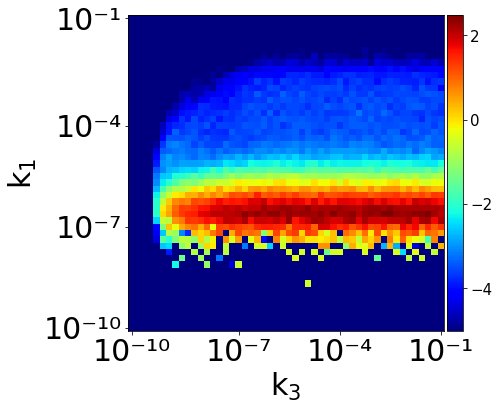

In [52]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
#m = ax1.imshow(newmatrix,cmap = 'jet',interpolation='lanczos')
m = ax1.imshow(newmatrix,cmap = 'jet')
#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

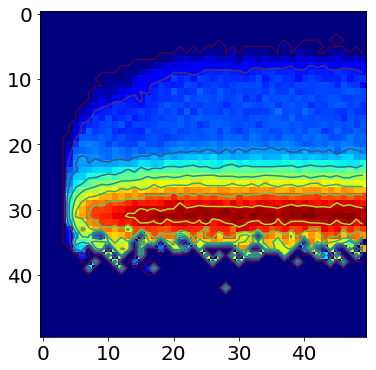

In [17]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet')
contour_m = contour(newmatrix)

# phi parameter using x1 + x2

In [53]:
# reading data
dir='/media/Data/swarm-article/figures/data/figure4/data-fig4a/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_dis_400sim_100Lx100L_rep0_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep10_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep11_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep12_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep13_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep15_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep16_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep17_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep18_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep19_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep1_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep20_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep2_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep3_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep4_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep5_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep6_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep7_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep8_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep9_lat_50_no_nuc.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)  

ready (50, 50, 21)


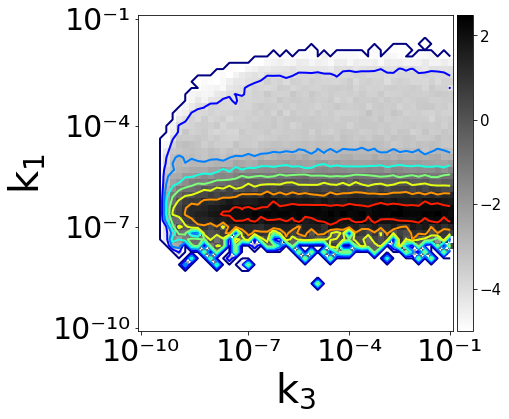

In [54]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)

newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.27))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'binary')
contour_m = contour(newmatrix,cmap='jet',linewidths=2)

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)


plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)
plt.savefig('fig4a_v1.png',bbox_inches='tight')

/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


(array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 9 Text yticklabel objects>)

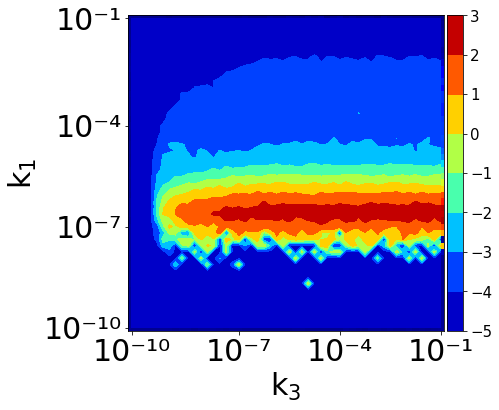

In [55]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)

newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:21],axis=2),0)-38.28))
newmatrix[newmatrix<-5]=-5
leves=np.arange(-5,1,2.5)
m = ax1.imshow(newmatrix,cmap = 'jet')
#contour_m = contour(newmatrix,cmap='binary',linewidths=5,levels=leves)
contour_m = contourf(newmatrix,cmap='jet',linewidths=5)

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)

plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contour_m, cax=cax)
plt.yticks(fontsize=15)

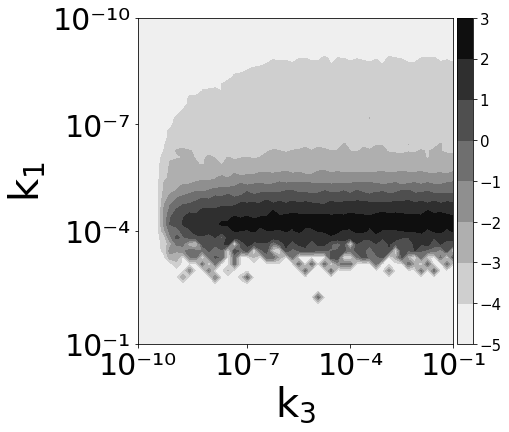

In [56]:
# preparing data
newmatrix=log(-1*(np.average(temp1[:,:,1:21],axis=2)-38.28))
newmatrix[newmatrix<-5]=-5

# preparing figure
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)

contour_m = contourf(newmatrix,cmap='binary')

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)


plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contour_m, cax=cax)
plt.yticks(fontsize=15)
plt.savefig('fig4a_v2.png',bbox_inches='tight')

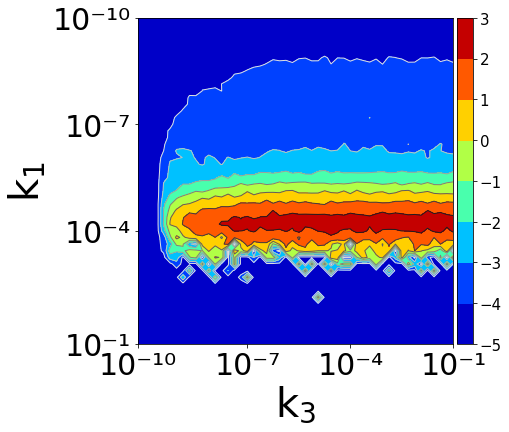

In [57]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)

newmatrix=log(-1*(np.average(temp1[:,:,1:21],axis=2)-38.28))
newmatrix[newmatrix<-5]=-5
leves=np.arange(-5,1,2.5)
#m = ax1.imshow(newmatrix,cmap = 'jet')
#contour_m = contour(newmatrix,cmap='binary',linewidths=5,levels=leves)
contourf_m = contourf(newmatrix,cmap='jet',linewidths=5)

contour_m = contour(newmatrix,cmap='binary',linewidths=1)

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)

plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf_m, cax=cax)
plt.yticks(fontsize=15)
plt.savefig('fig4a_v3.png',bbox_inches='tight')

In [58]:
# reading data
dir='/media/Data/swarm-article/figures/data/figure4/data-fig4a_v2_just_swarmers/v2/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_distance_rep0_03_26_2021.txt",
      "data_pair_distance_rep11_03_26_2021.txt",
      "data_pair_distance_rep13_03_26_2021.txt",
      "data_pair_distance_rep16_03_26_2021.txt",
      "data_pair_distance_rep20_2_03_26_2021.txt",
      "data_pair_distance_rep21_03_26_2021.txt",
      "data_pair_distance_rep24_03_26_2021.txt",
      "data_pair_distance_rep3_03_26_2021.txt",
      "data_pair_distance_rep7_03_26_2021.txt",
      "data_pair_distance_rep1_03_26_2021.txt",
      "data_pair_distance_rep12_03_26_2021.txt",
      "data_pair_distance_rep15_03_26_2021.txt",
      "data_pair_distance_rep20_03_26_2021.txt",
      "data_pair_distance_rep2_03_26_2021.txt",
      "data_pair_distance_rep23_03_26_2021.txt",
      "data_pair_distance_rep25_03_26_2021.txt",
      "data_pair_distance_rep4_03_26_2021.txt",
      "data_pair_distance_rep8_03_26_2021.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)  

ready (50, 50, 19)


In [59]:
# replacing NAN values by mean values
ini_array = log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
#print(ini_array)

col_mean = np.nanmean(ini_array,axis=1)
inds = np.where(np.isnan(ini_array))
#print(inds)

ini_array[inds] = np.take(col_mean,inds[1])
#print(ini_array)

(array([-6., -4., -2.,  0.,  2.]), <a list of 5 Text yticklabel objects>)

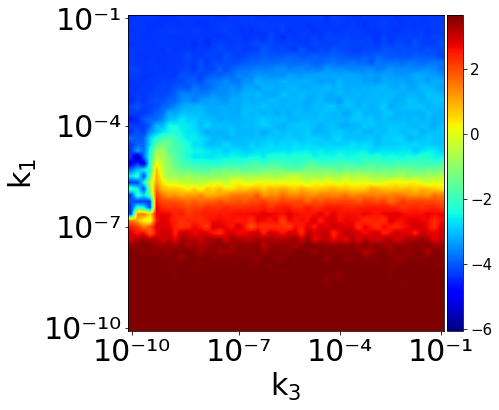

In [60]:
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:6],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
m = ax1.imshow(ini_array,cmap = 'jet',interpolation='bilinear')
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

(array([0.09090909, 0.27272727, 0.45454545, 0.63636364, 0.81818182,
        1.        ]), <a list of 6 Text yticklabel objects>)

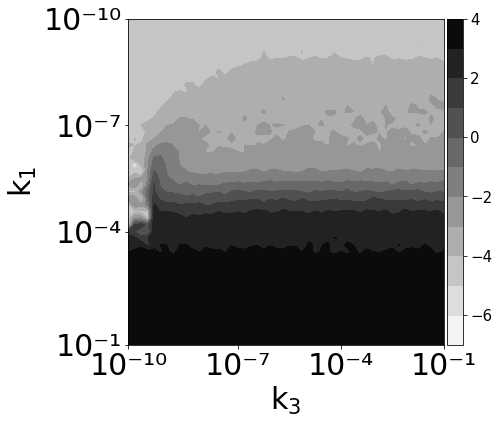

In [61]:
# preparing figure
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)

contour_m = contourf(np.flip(ini_array,0),10,cmap='binary')

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)


plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contour_m, cax=cax)
plt.yticks(fontsize=15)

(array([0.09090909, 0.27272727, 0.45454545, 0.63636364, 0.81818182,
        1.        ]), <a list of 6 Text yticklabel objects>)

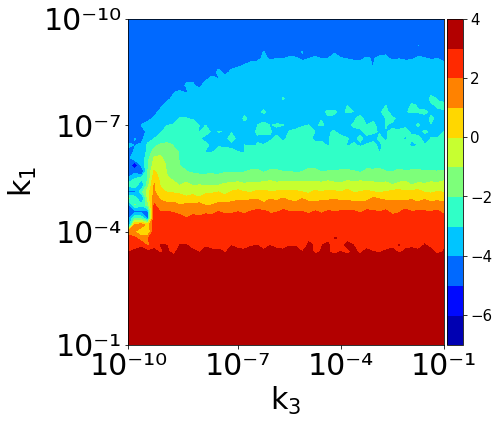

In [62]:
# preparing figure
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)


contour_m = contourf(np.flip(ini_array,0),10,cmap='jet')

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)


plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contour_m, cax=cax)
plt.yticks(fontsize=15)

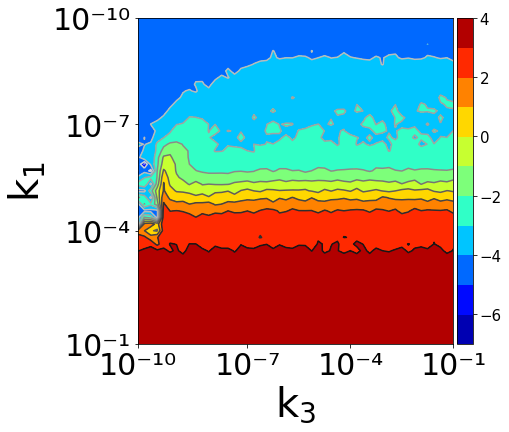

In [63]:
# preparing figure
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)


contourf_m = contourf(np.flip(ini_array,0),10,cmap='jet')

contour_m = contour(np.flip(ini_array,0),10,cmap='binary')

y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=30)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=30)


plt.ylabel('$\mathregular{k_1}$',fontsize=40)
plt.xlabel('$\mathregular{k_3}$',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf_m, cax=cax)
plt.yticks(fontsize=15)
plt.savefig('fig4a_v4.png',bbox_inches='tight')

In [64]:
# reading data
dir='/media/Data/swarm-article/figures/data/figure4/data-fig4a/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_dis_400sim_100Lx100L_rep0_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep10_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep11_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep12_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep13_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep15_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep16_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep17_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep18_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep19_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep1_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep20_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep2_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep3_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep4_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep5_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep6_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep7_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep8_lat_50_no_nuc.txt",\
      "data_pair_dis_400sim_100Lx100L_rep9_lat_50_no_nuc.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape)  

ready (50, 50, 21)


/media/Data/MARCC/without_nuc/rep0/lm_traj/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


Text(0.5, 0.31, 'e')

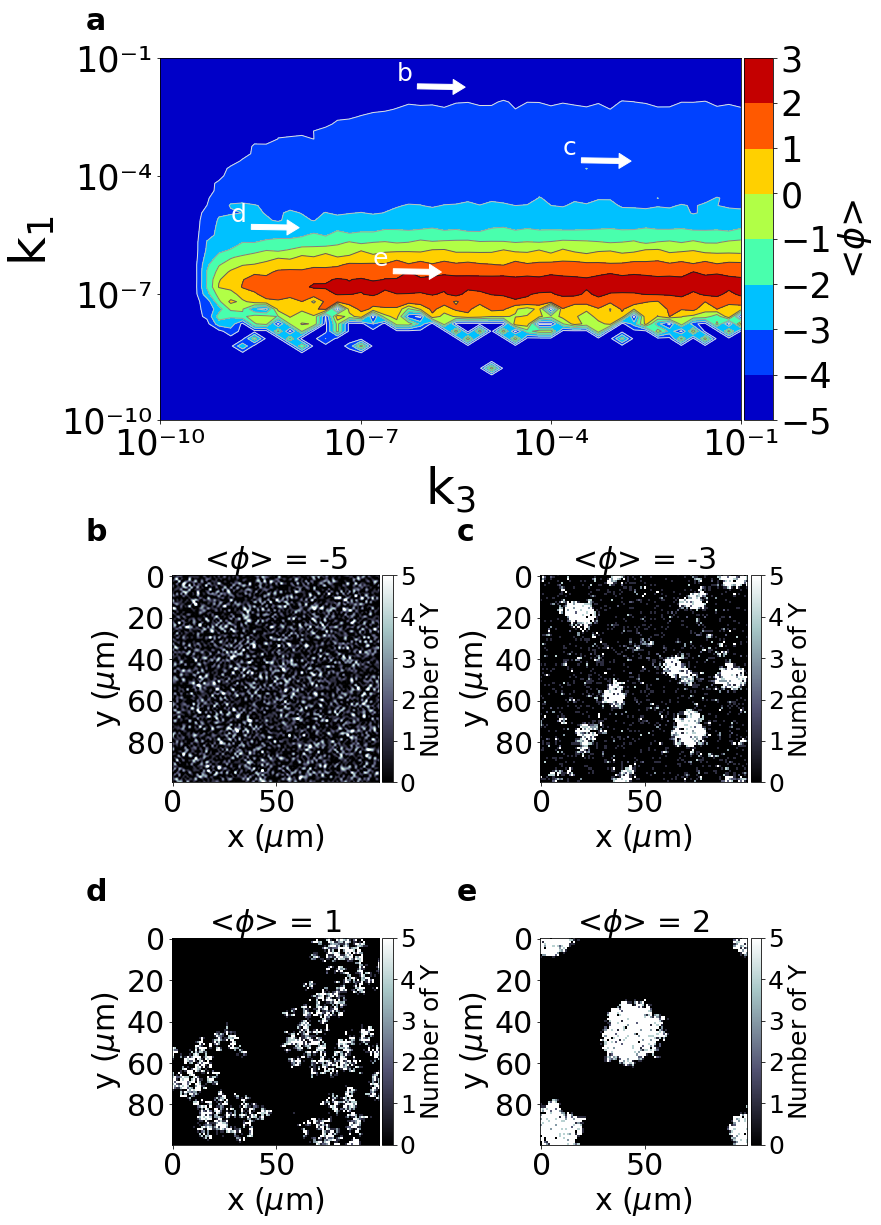

In [66]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
dir ='/media/Data/MARCC/without_nuc/rep0/lm_traj/'
dir2 ='/media/Data/swarm-article/figures/data/figure4/data-fig4bcde/fractal_shape_long_sim/'
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])

newmatrix=log(-1*(np.average(temp1[:,:,1:21],axis=2)-38.28))
newmatrix[newmatrix<-5]=-5
leves=np.arange(-5,1,2.5)
#m = ax1.imshow(newmatrix,cmap = 'jet')
#contour_m = contour(newmatrix,cmap='binary',linewidths=5,levels=leves)
contourf_m = contourf(newmatrix,cmap='jet',linewidths=5)

contour_m = contour(newmatrix,cmap='binary',linewidths=1)

#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([0,17,33,49]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf_m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,45),xytext=(20,45.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(40,35),xytext=(34,35.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,26),xytext=(6,26.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(24,20),xytext=(18,20.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir2+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 1', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir2+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir2+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4_no_nuc_04_12_2021.png',bbox_inches='tight')

# NEW PHI PARAMETER

In [67]:
# reading data
dir='/media/Data/swarm-article/figures/data/figure4/data-fig4a_v2_just_swarmers/v2/'
temp1=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_distance_rep0_03_26_2021.txt",
      "data_pair_distance_rep11_03_26_2021.txt",
      "data_pair_distance_rep13_03_26_2021.txt",
      "data_pair_distance_rep16_03_26_2021.txt",
      "data_pair_distance_rep20_2_03_26_2021.txt",
      "data_pair_distance_rep21_03_26_2021.txt",
      "data_pair_distance_rep24_03_26_2021.txt",
      "data_pair_distance_rep3_03_26_2021.txt",
      "data_pair_distance_rep7_03_26_2021.txt",
      "data_pair_distance_rep1_03_26_2021.txt",
      "data_pair_distance_rep12_03_26_2021.txt",
      "data_pair_distance_rep15_03_26_2021.txt",
      "data_pair_distance_rep20_03_26_2021.txt",
      "data_pair_distance_rep2_03_26_2021.txt",
      "data_pair_distance_rep23_03_26_2021.txt",
      "data_pair_distance_rep25_03_26_2021.txt",
      "data_pair_distance_rep4_03_26_2021.txt",
      "data_pair_distance_rep8_03_26_2021.txt"]
for i in data:
    filename=dir+i
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    temp1=np.concatenate((temp1,data_pair_dis),axis=2)
print("ready",temp1.shape) 

ready (50, 50, 19)


In [68]:
# replacing NAN values by mean values
ini_array = log(-1*(np.flip(np.average(temp1[:,:,1:19],axis=2),0)-38.28))
#print(ini_array)

col_mean = np.nanmean(ini_array,axis=1)
inds = np.where(np.isnan(ini_array))
#print(inds)

ini_array[inds] = np.take(col_mean,inds[1])
#print(ini_array)

/media/Data/MARCC/without_nuc/rep0/lm_traj/k1_2.812e-02_and_k3_3.089e-07_100x100.lm


Text(0.5, 0.31, 'e')

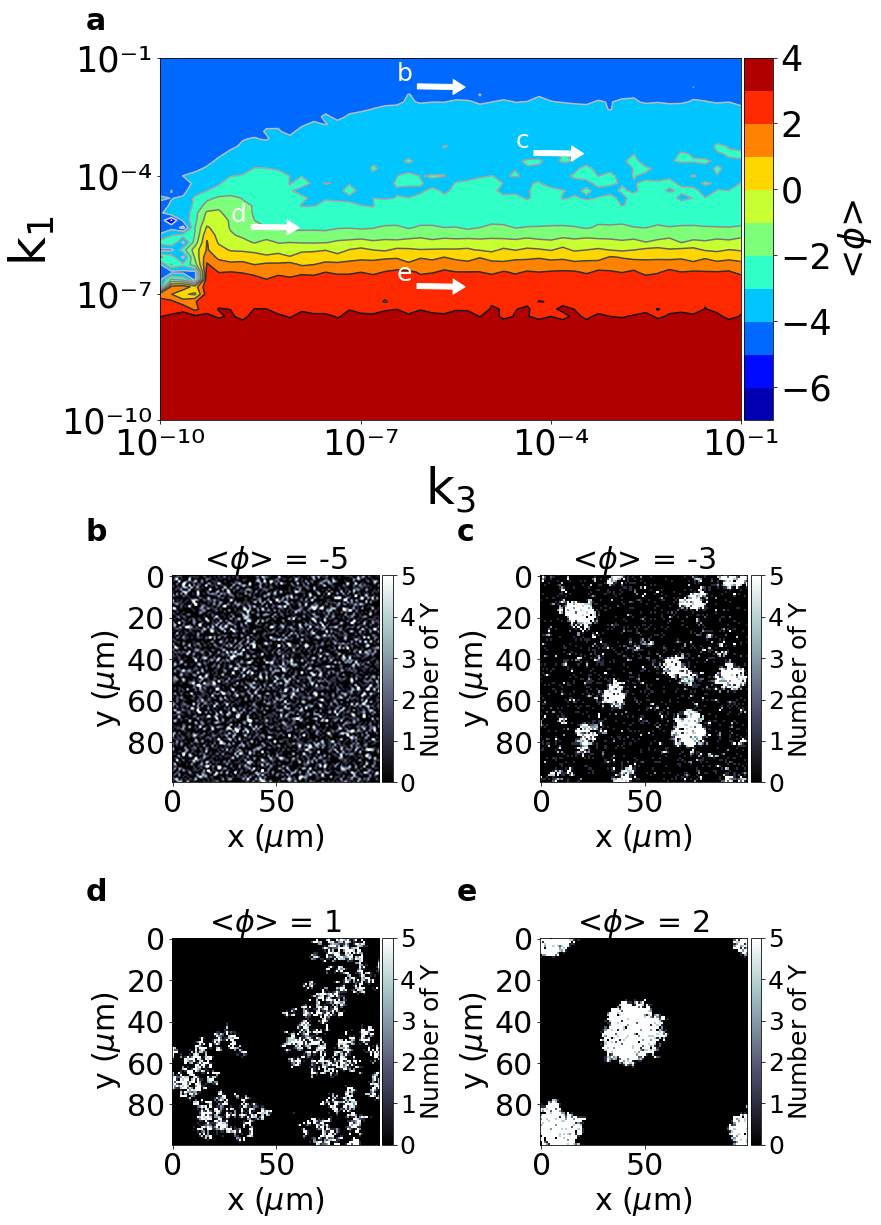

In [69]:
# Where is the data to reproduce this plot?
# figure a is xanthus:
# /scratch/bciezah1/phase_separation/paper/x1_400_nucleated/sampling_test/x1_400/k1_vs_k3/paper/no-nuc/output
# figure b,c,d, and e is xanthus:
# /scratch/bciezah1/phase_separation/paper/figure4def
dir ='/media/Data/MARCC/without_nuc/rep0/lm_traj/'
dir2 ='/media/Data/swarm-article/figures/data/figure4/data-fig4bcde/fractal_shape_long_sim/'
fig = plt.figure(figsize=(11,20))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[0.5,0.5,1,1], wspace=0.5,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2])

contourf_m = contourf(np.flip(ini_array,0),10,cmap='jet')

contour_m = contour(np.flip(ini_array,0),10,cmap='binary')


#y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([0,17,33,49]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ ',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(contourf_m, cax=cax)
plt.yticks(fontsize=35);plt.ylabel('<$\phi$>',fontsize=35)
#plt.ylabel('<$\phi$>',rotation='horizontal')
A=[[0],[1]]
ax1.annotate('b',color='white',xy=(26,45),xytext=(20,45.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('c',color='white',xy=(36,36),xytext=(30,36.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('d',color='white',xy=(12,26),xytext=(6,26.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))
ax1.annotate('e',color='white',xy=(26,18),xytext=(20,18.8),fontsize=25,arrowprops=dict(width=5,headwidth=15,shrink=0.05,linewidth=1,color='white'))



#################
ax2 = fig.add_subplot(gs[2:3, 0:1]) #b

filename1 =dir+"k1_2.812e-02_and_k3_3.089e-07_100x100.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -5', fontsize=30)
m=ax2.imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

ax4 = fig.add_subplot(gs[3:4, 0:1]) #d
filename1 =dir2+"k1_1.099e-06_and_k3_2.442e-08_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[800]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 1', fontsize=30)
m=ax4.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


ax3 = fig.add_subplot(gs[2:3, 1:2]) #c

#dir2='/media/Data/MARCC/without_nuc/long_trajectories_for_plot_fig4/fractal_shape_long_sim/'
filename1 =dir2+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"

fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -3', fontsize=30)
m=ax3.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

############################################

ax5 = fig.add_subplot(gs[3:4, 1:2]) #e
filename1 =dir2+"k1_1.099e-06_and_k3_1.099e-06_100x100_nuc_prod.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[900]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = 2', fontsize=30)
m=ax5.imshow(TrasnPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)

#######################################################################################
figtext(0.032,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.560,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.560,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.032,0.310,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.500,0.310,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#plt.savefig('fig4_no_nuc_04_12_2021_new_phi.png',bbox_inches='tight')